In [1]:
import pandas as pd
import xuleta as xu
import numpy as np
import pylab as plt

In [7]:
data = "/home/denis/pcloud/PB_carlos/data/cattle_headless_muni.csv"

In [10]:
y=[[str(x)+'B',str(x)+'C',str(x)+'O'] for x in range(1991,2017)]
y = np.asarray(y)
y = y.flatten()

In [11]:
df = pd.read_csv(data)
df.set_index(df['code'],inplace=True,drop=True)
df.drop('code',inplace=True,axis=1)
df.columns = y
df.columns

Index(['1991B', '1991C', '1991O', '1992B', '1992C', '1992O', '1993B', '1993C',
       '1993O', '1994B', '1994C', '1994O', '1995B', '1995C', '1995O', '1996B',
       '1996C', '1996O', '1997B', '1997C', '1997O', '1998B', '1998C', '1998O',
       '1999B', '1999C', '1999O', '2000B', '2000C', '2000O', '2001B', '2001C',
       '2001O', '2002B', '2002C', '2002O', '2003B', '2003C', '2003O', '2004B',
       '2004C', '2004O', '2005B', '2005C', '2005O', '2006B', '2006C', '2006O',
       '2007B', '2007C', '2007O', '2008B', '2008C', '2008O', '2009B', '2009C',
       '2009O', '2010B', '2010C', '2010O', '2011B', '2011C', '2011O', '2012B',
       '2012C', '2012O', '2013B', '2013C', '2013O', '2014B', '2014C', '2014O',
       '2015B', '2015C', '2015O', '2016B', '2016C', '2016O'],
      dtype='object')

In [5]:
%%time


df2 =pd.DataFrame(data=None,index=df.index)
for i in range(1991,2017,1):
    tosum = [str(x) for x in df.columns if x[:4] == str(i)]
    df2[i] = df[tosum].sum(axis=1)
df2.to_csv('/home/denis/pcloud/PB_carlos/data/cattle_muni_sum_long.csv')

ts = df2.T

trends = pd.DataFrame(index=ts.columns)
 
trends['1991-2009-z'],trends['1991-2009-trend'],trends['2009-2016-z'],trends['2009-2016-trend'] = None,None,None,None
for i in ts.columns:
    trends['1991-2009-z'][i] = xu.mk_test(np.asarray(ts[i].loc[1991:2009]),alpha=0.05)[3]
    trends['1991-2009-trend'][i] = xu.mk_test(np.asarray(ts[i].loc[1991:2009]),alpha=0.05)[0]
    trends['2009-2016-z'][i] = xu.mk_test(np.asarray(ts[i].loc[2009:2016]),alpha=0.05)[3]
    trends['2009-2016-trend'][i] = xu.mk_test(np.asarray(ts[i].loc[2009:2016]),alpha=0.05)[0]

CPU times: user 5.63 s, sys: 60.2 ms, total: 5.69 s
Wall time: 7.09 s


In [12]:
%%time
start = 1999
stop = 2012

df2 =pd.DataFrame(data=None,index=df.index)
for i in range(start,stop+1,1):
    tosum = [str(x) for x in df.columns if x[:4] == str(i)]
    df2[i] = df[tosum].sum(axis=1)
df2.to_csv('/home/denis/pcloud/PB_carlos/data/cattle_muni_sum_long.csv')

ts = df2.T

trends = pd.DataFrame(index=ts.columns)
 
trends[str(start)+'-'+str(stop+1)+'-z'],trends[str(start)+'-'+str(stop+1)+'-trend'] = None,None
for i in ts.columns:
    trends[str(start)+'-'+str(stop+1)+'-z'][i] = xu.mk_test(np.asarray(ts[i].loc[1991:2009]),alpha=0.05)[3]
    trends[str(start)+'-'+str(stop+1)+'-trend'][i] = xu.mk_test(np.asarray(ts[i].loc[1991:2009]),alpha=0.05)[0]
  

CPU times: user 2.52 s, sys: 13.8 ms, total: 2.54 s
Wall time: 2.67 s


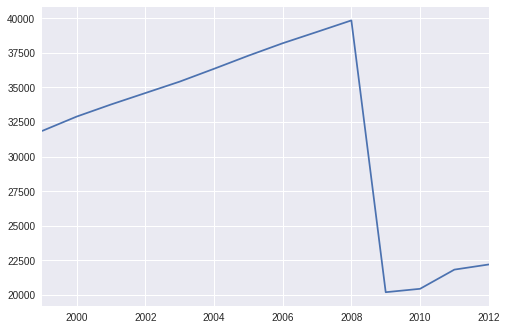

In [13]:
ts[2915353].plot()
plt.show()

In [14]:
trends.to_csv('/home/denis/pcloud/PB_carlos/data/trends_cattle_muni_'+str(start)+'-'+str(stop+1)+'.csv')

In [15]:
trends

,1999-2013-z,1999-2013-trend
code,,
2100055,3.425,increasing
2100105,-2.491,decreasing
2100154,4.204,increasing
2100204,4.204,increasing
2100303,-0.311,no trend
2100402,4.204,increasing
2100436,1.246,no trend
2100477,3.27,increasing
2100501,4.204,increasing


In [105]:
trends.max(axis=0)

2002-2011-z           3.935
2002-2011-trend    no trend
2011-2016-z            2.63
2011-2016-trend    no trend
dtype: object

In [106]:
trends.min(axis=0)

2002-2011-z            -3.935
2002-2011-trend    decreasing
2011-2016-z             -2.63
2011-2016-trend    decreasing
dtype: object